In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [2]:
train_file = open("mnist_dataset/mnist_train.csv", "r")
train_list = train_file.readlines()
train_file.close()
print(len(train_list))

60001


In [3]:
 train_list[99]

'3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,108,233,253,255,180,101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,219,252,252,252,253,252,227,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85,222,252,233,141,69,79,227,252,160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,253,235,64,0,0,0,161,252,160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,128,18,0,0,0,22,244,252,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97,253,184,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,99,253,244,98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,153,240,252,253,240,101,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,252,252,252,253,252,252,215,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,221,210,137,23,96,221,252,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

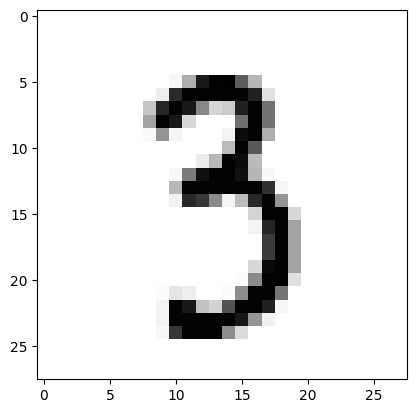

In [4]:
values = train_list[99].split(",")
image_array = np.asfarray(values[1:]).reshape((28,28))
plt.imshow(image_array, cmap="Greys", interpolation="None")

In [5]:
test_file = open("mnist_dataset/mnist_test.csv", "r")
test_list = test_file.readlines()
test_file.close()
print(len(test_list))

10001


In [6]:
test_list[999]

'8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,19,45,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,85,134,229,215,240,252,198,197,197,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,113,226,231,252,252,253,252,252,252,253,252,252,190,0,0,0,0,0,0,0,0,0,0,0,0,92,253,253,253,255,253,253,253,254,253,253,253,254,253,253,241,16,104,141,141,0,0,0,0,0,0,0,0,216,252,252,252,253,252,252,252,247,196,196,196,197,196,240,215,216,252,252,252,0,0,0,0,0,0,0,0,253,252,252,252,253,252,252,177,50,0,0,0,0,82,240,252,253,252,224,118,0,0,0,0,0,0,0,0,203,252,252,252,253,252,252,228,114,38,0,0,176,243,252,252,253,151,19,0,0,0,0,0,0,0,0,0,0,101,235,253,254,253,253,253,254,253,165,241,254,253,253,253,163,38,

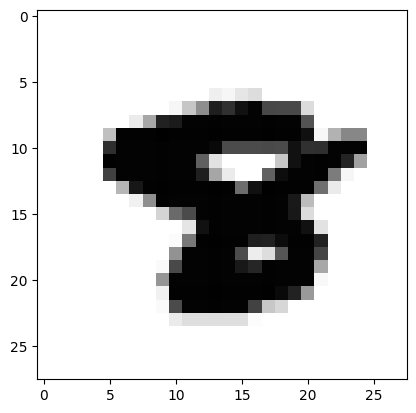

In [7]:
values = test_list[999].split(",")
image_array = np.asfarray(values[1:]).reshape((28,28))
plt.imshow(image_array, cmap="Greys", interpolation="None")

In [9]:
class DNN:
    def __init__(self,sizes=[784, 128, 64, 10], epochs = 10, lr=0.001):
        self.sizes = sizes
        self.epochs = epochs
        self.lr = lr

        input_layer = sizes[0]
        hidden_1 = sizes[1]
        hidden_2 = sizes[2]
        output_layer = sizes[3]

        self.params = {
            'W1' : np.random.randn(hidden_1, input_layer) * np.sqrt(1./hidden_1), #128x784
            'W2': np.random.randn(hidden_2, hidden_1) * np.sqrt(1./hidden_2),   #64x128
            'W3': np.random.randn(output_layer, hidden_2) * np.sqrt(1./output_layer),  #10x64
        }
    def sigmoid(self, x, derivative =False):
            if derivative:
                return (np.exp(-x))/((np.exp(-x)+1)**2)
            return 1/(1+np.exp(-x))
        
    def softmax(self, x, derivative=False):
        exps = np.exp(x-x.max())
        if derivative:
            return exps/np.sum(expx, axis=0) * (1-exps / np.sum(exps,axis=0))
        return  exps / np.sum(exps,axis=0)
            
        

    
    def forward_pass(self, x_train):
        params = self.params

        params['A0'] = x_train  # 784x1

        #input layer to hidden_1
        params['Z1'] = np.dot(params['W1'],params['A0']) # 128x1
        params['A1'] = self.sigmoid(params['Z1'])

        #hidden_1 to hidden_2
        params['Z2'] = np.dot(params['W2'],params['A0'])
        params['A2'] = self.sigmoid(params['Z2'])

       #hidden_2 to output_layer
        params['Z3'] = np.dot(params['W3'],params['A2']) # 128x1
        params['A3'] = self.softmax(params['Z3'])

        return params['Z3']
    
        
    def backward_pass(self, y_train, output):
        params = self.params

        change_w ={}

        # calculate W3 update
        error = e* (output- y_train)/output.shape[0]*self.softmax(params['Z3'],derivative=True)
        change_w['W3']= np.outer(error,params['A2'])

        # calulate W1 update
        error = np.dot(params['W3'].T,error)*self.softmax(params['Z3'],derivative=True)
        change_w['W2']= np.outer(error,params['A1'])

        #calculate W1 update

        error = np.dot(params['W2'].T,error)*self.softmax(params['Z1'],derivative=True)
        change_w['W1']= np.outer(error,params['A0'])


        return change_w


    def update_weights(self, change_w):
        for key, val in change_w.items():
            self.params[key] -= self.lr * val 
        
        

        
        
        
    def compute_accuracy(self,test_data):
        predictions = []
        for x in train_list:
                values = x.plsit(",")
                inputs = (np.asfarray(values[1:])/ 255.0*0.99)+0.01
                targets = np.zeros(10) + 0.01
                targets[int(values[0])] = 0.99
                output = self.forward_pass(inputs)
                pred = np.argmax(output)
                predictions.append(pred==np.argmax(targets))

        return np.mean(predictions)

    def train(self, train_list, test_list):
        start_time = time.time()
        for i in range(self.epochs):
            for x in train_list:
                values = x.split(",")
                inputs = (np.asfarray(values[1:])/ 255.0 * 0.99)+0.01
                targets = np.zeros(10) + 0.01
                targets[int(values[0])] = 0.99
                output = self.forward_pass(inputs)
                change_w = self.backward_pass(targets, output)
                self.update_weights(change_w)
            accuracy = self.compute_accuracy(test_list)
            print('Epoch: {0}, Time Spend: {1:.02f}s Accuracy: {2:.2f}%'.format(i+1, time.time()-start_time, accuracy*100))

In [11]:
dnn = DNN(sizes=[784, 128, 64, 10], epochs=10, lr=0.001)
dnn.train(train_list, test_list)

ValueError: could not convert string to float: '1x1'